# Langsmith
- langsmith는 langchain에서 만든 온라인 기반의 LLM 애플리케이션 모니터링, 테스트 지원, 배포 지원 도구이다.

## [Concepts](https://docs.smith.langchain.com/observability/concepts)
- 이 개념 가이드는 LangSmith에 추적 로그를 기록할 때 이해해야 할 중요한 주제를 다룹니다.
- Trace는 애플리케이션이 입력에서 출력으로 가는 일련의 단계를 의미합니다. 이 각각의 개별 단계는 Run으로 표현됩니다.
- Project는 단순히 여러 개의 Trace 모음입니다.

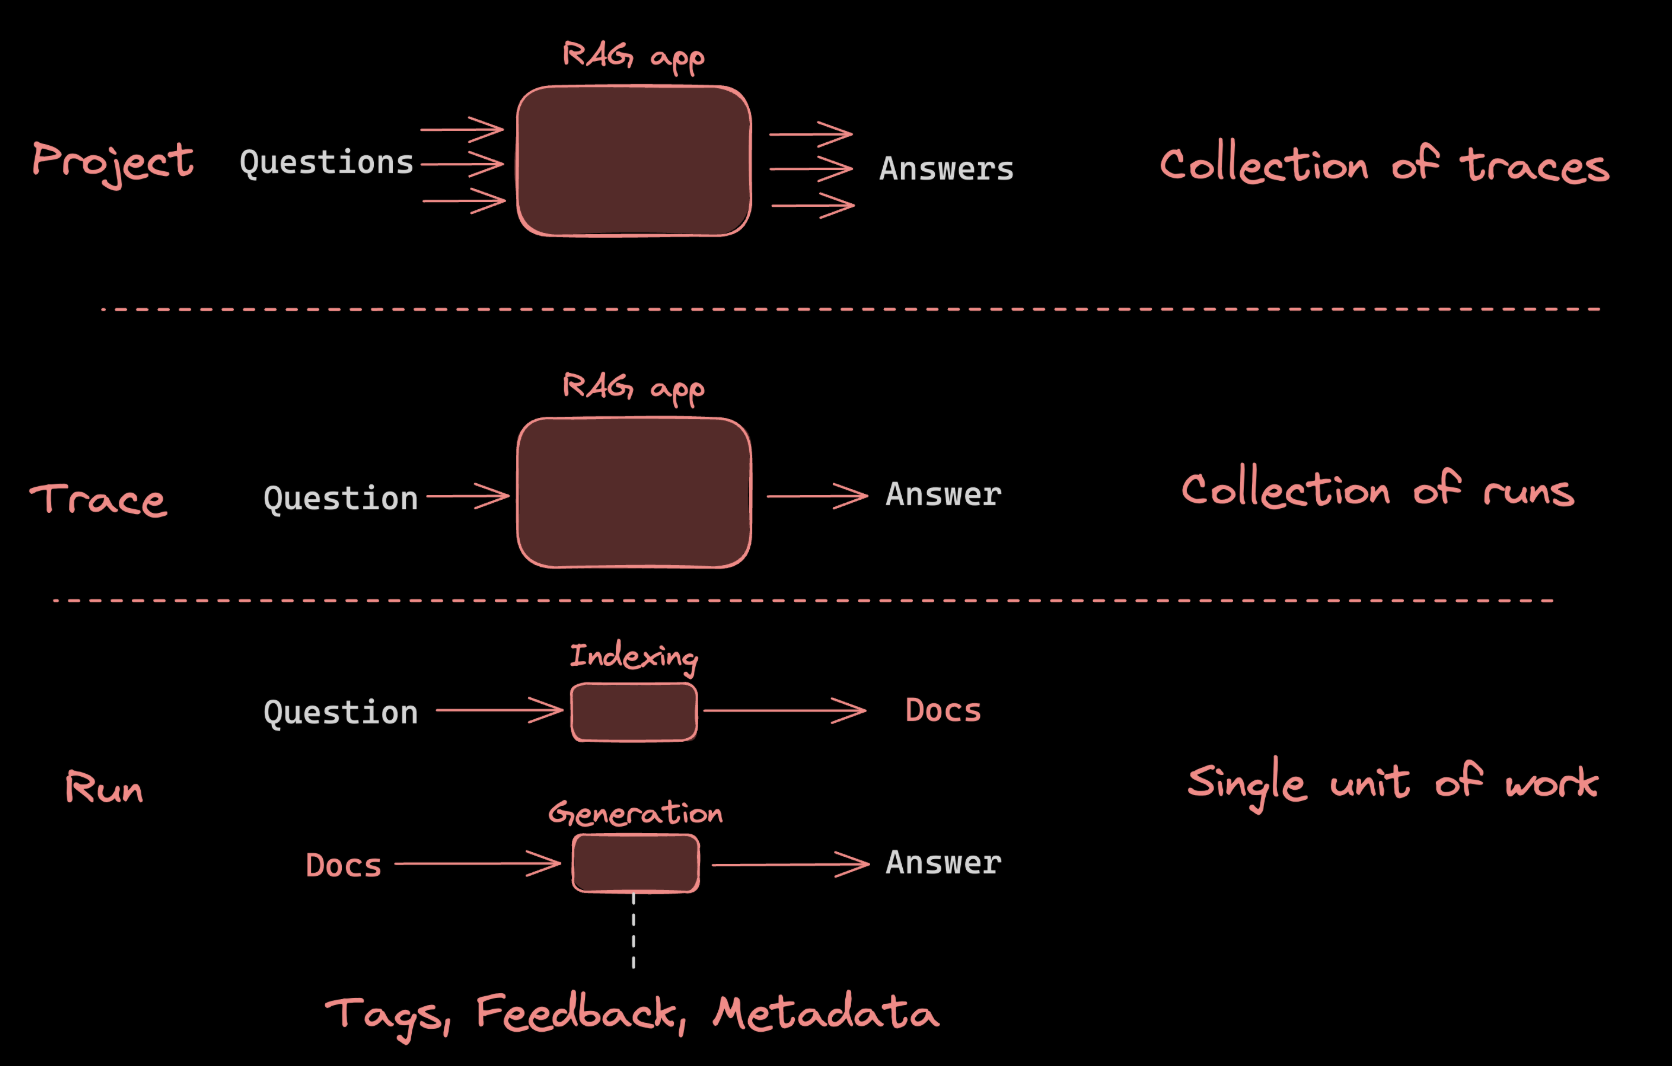

### Projects
- Project는 여러 Trace의 모음입니다.
- 프로젝트는 단일 애플리케이션이나 서비스와 관련된 모든 Trace를 담는 컨테이너로 생각할 수 있습니다.
- 여러 개의 프로젝트를 가질 수 있으며, 각 프로젝트는 여러 Trace를 포함할 수 있습니다.

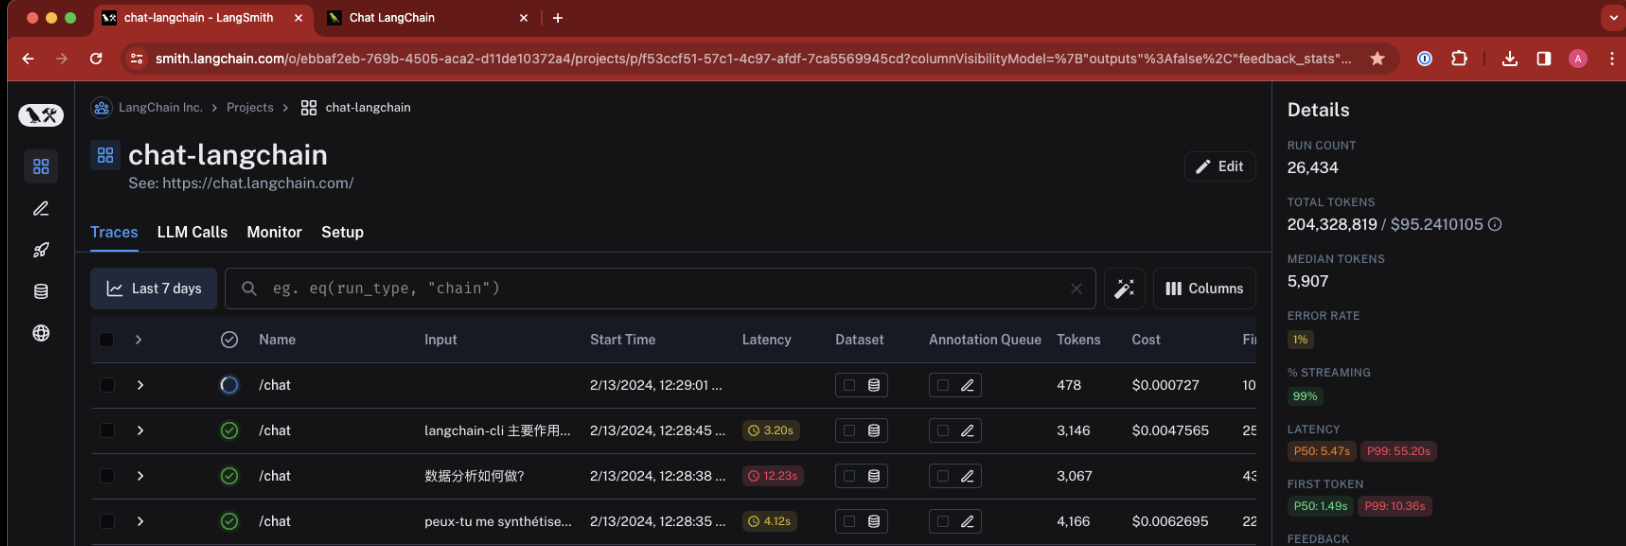

### Trace
- Trace는 단일 작업과 관련된 여러 Run의 모음입니다.
- 예를 들어, 사용자 요청이 체인을 트리거하고, 그 체인이 LLM에 대한 호출을 하고, 이후 출력 파서를 호출하는 등의 작업을 한다면, 이러한 모든 Run은 동일한 Trace의 일부가 됩니다.
- Run은 고유한 Trace ID에 의해 Trace에 묶입니다.

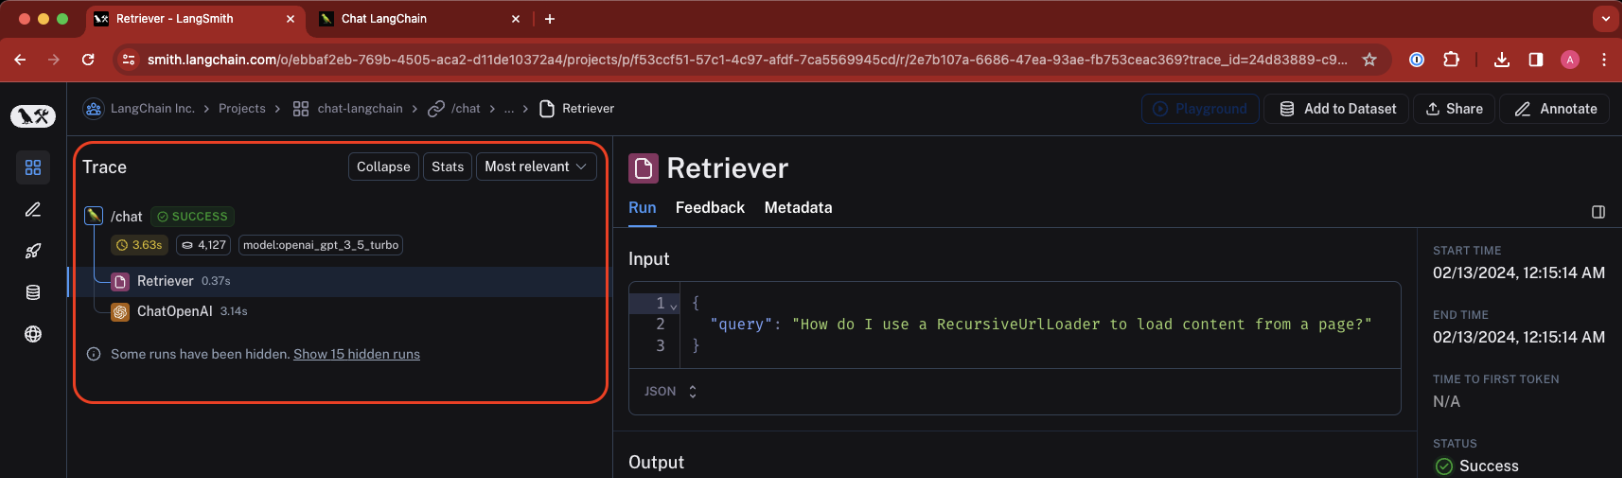

### Run
- Run은 LLM 애플리케이션 내에서 단일 작업 또는 운영 단위를 나타내는 범위입니다.
- 이는 LLM 또는 체인에 대한 단일 호출, 프롬프트 형식 지정 호출, 실행 가능한 람다 호출 등 무엇이든 될 수 있습니다.

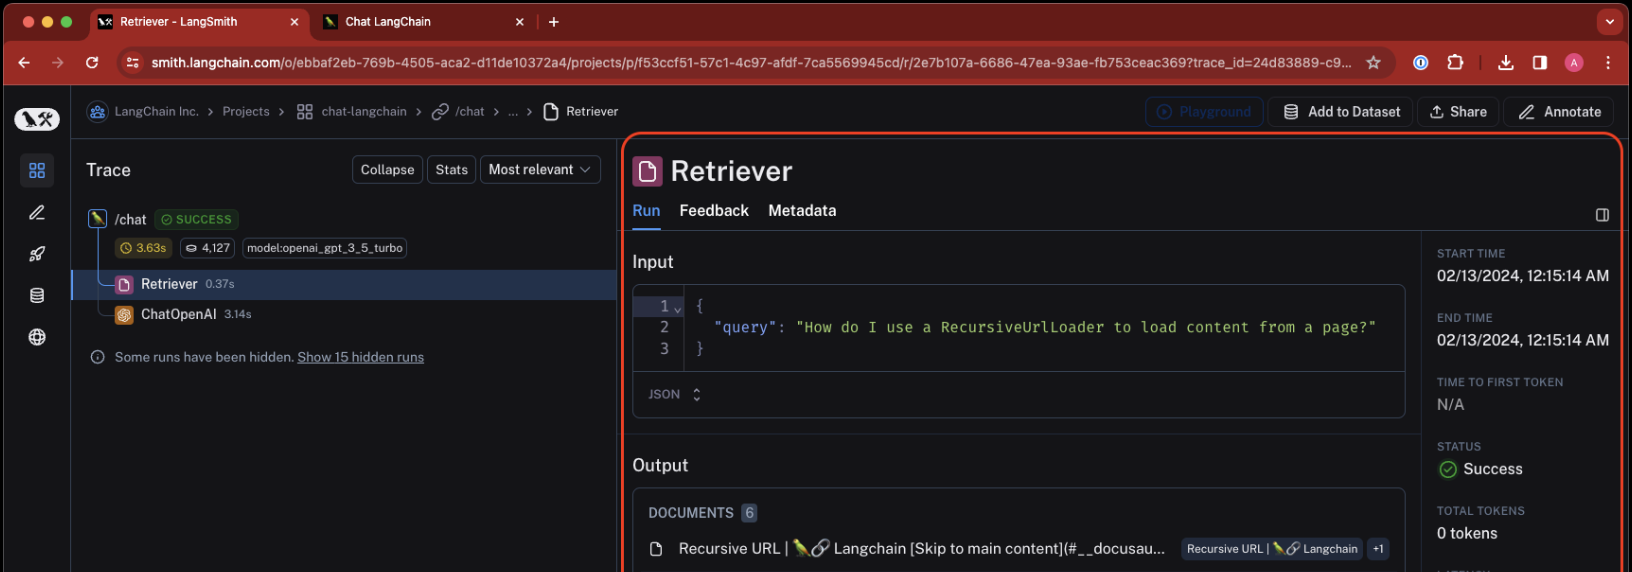

## Langsmith API Key

### [API Key 생성하기](https://smith.langchain.com/)

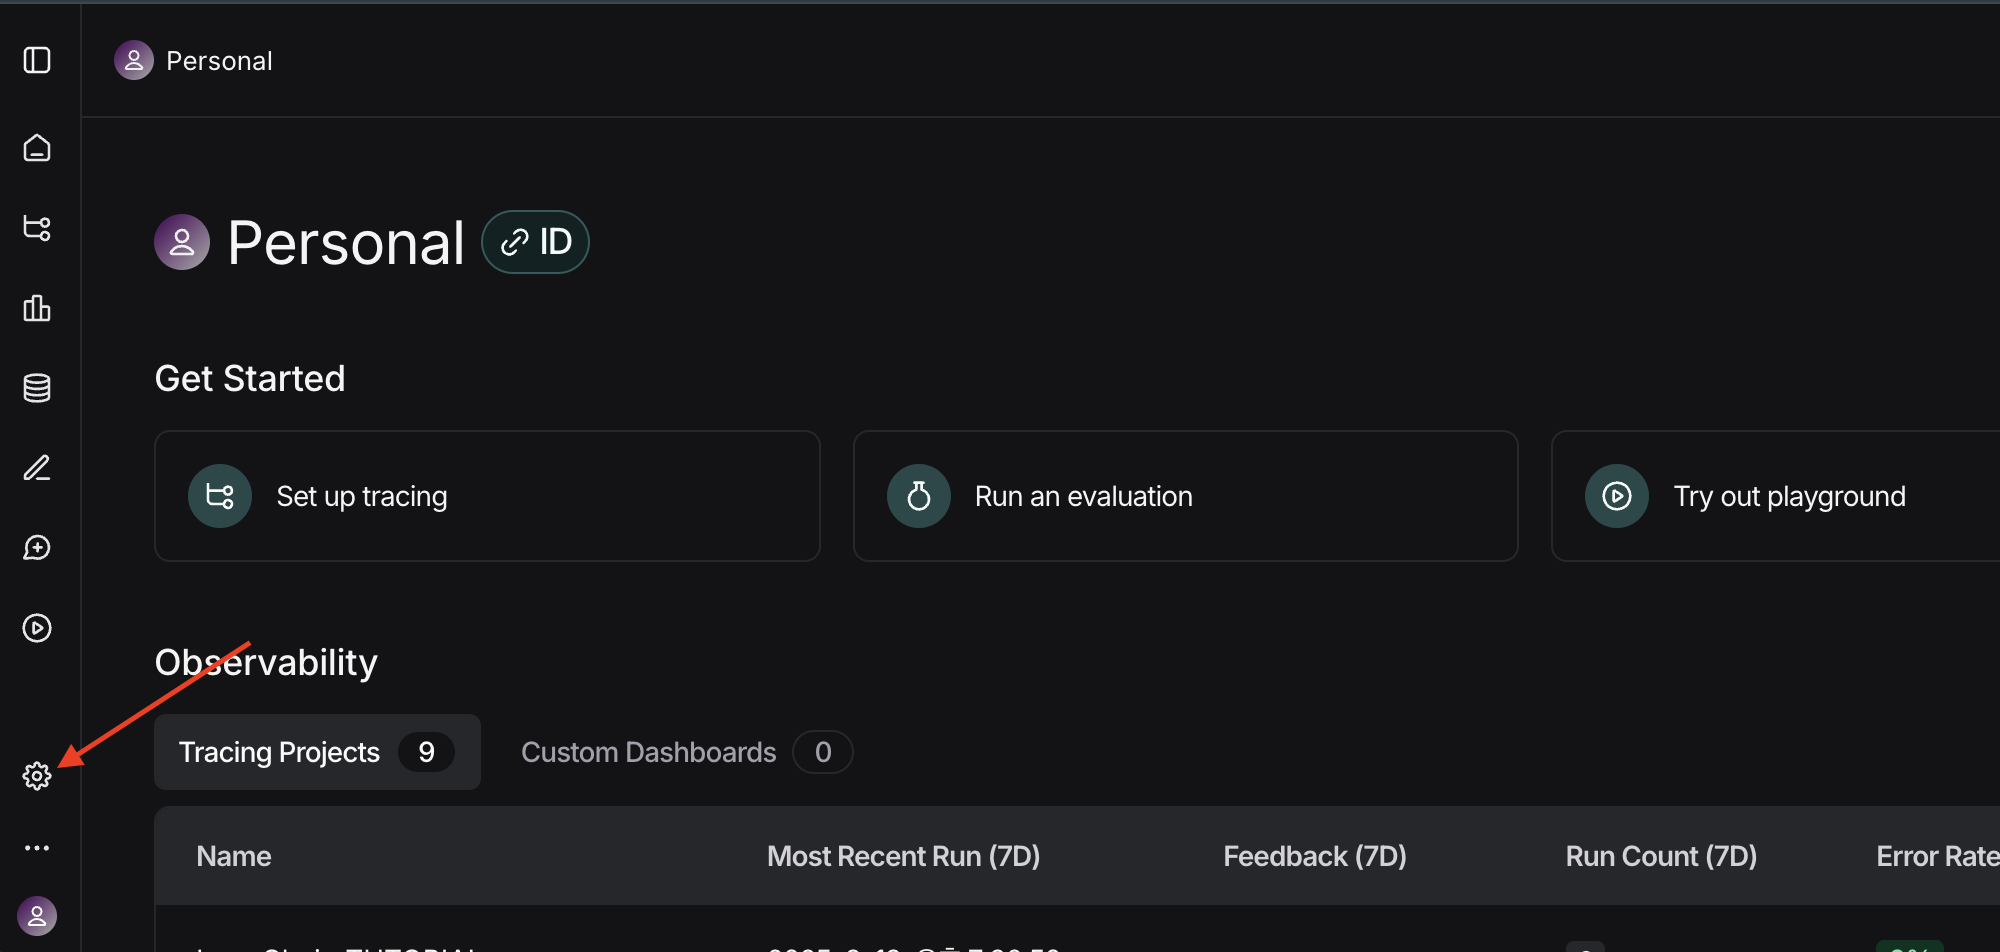

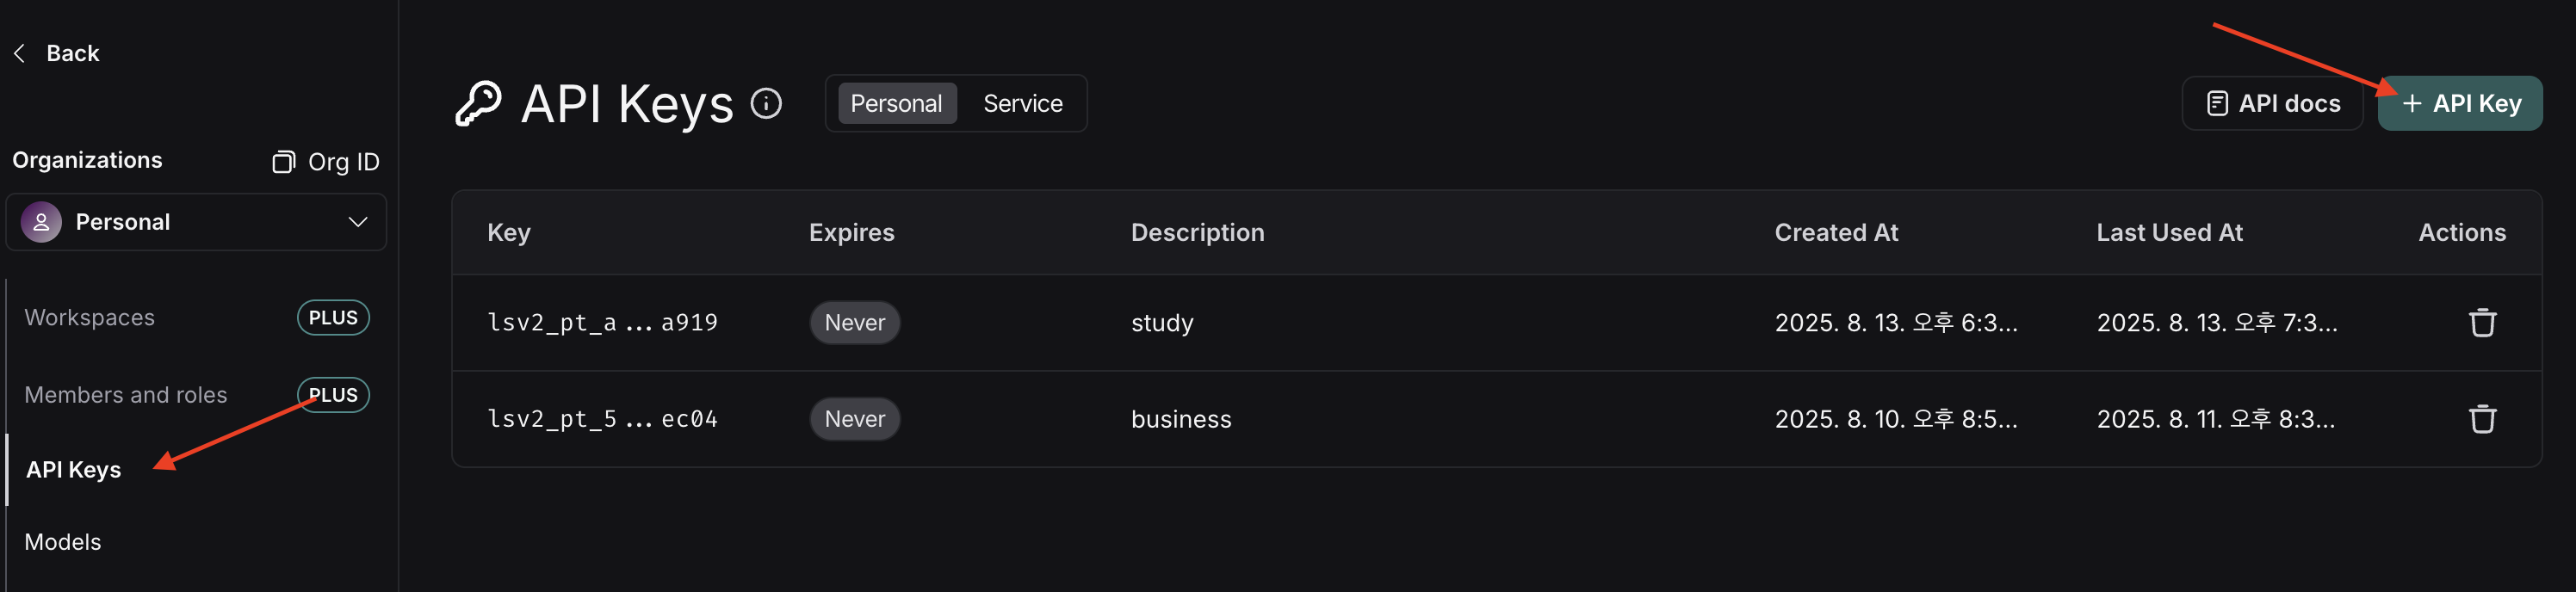

## Langsmith 설정
- LANGCHAIN_TRACING_V2: "true" 로 설정하면 추적을 시작합니다.
- LANGCHAIN_ENDPOINT: https://api.smith.langchain.com 변경하지 않습니다.
- LANGCHAIN_API_KEY: 이전 단계에서 발급받은 키 를 입력합니다.
- LANGCHAIN_PROJECT: 프로젝트 명 을 기입하면 해당 프로젝트 그룹으로 모든 실행(Run) 이 추적됩니다.

# Setup

## 환경변수 로드

In [ ]:
# 필요한 라이브러리 import
import os
from dotenv import load_dotenv

# 환경변수 로드
load_dotenv()

True

## 라이브러리 로드

In [ ]:
from langchain.prompts import ChatPromptTemplate
from langchain_core.messages import SystemMessage
from langchain_core.prompts import HumanMessagePromptTemplate
from langchain_core.output_parsers import StrOutputParser

from langchain_groq import ChatGroq

## Groq LLM 설정

In [ ]:
# LLM 모델 설정
llm = ChatGroq(
    model_name="llama-3.3-70b-versatile",
    temperature=1.0,
    model_kwargs={
        "top_p":0.9,                     # nucleus sampling (0.8~0.95 권장)
        "frequency_penalty":0.7,         # 반복 억제
        "presence_penalty":0.6,          # 새로운 아이디어 유도
    }
)


# 병렬 체인 (Parallel Chains) 예시
- RunnableParallel

## 다양한 프롬프트 템플릿 생성

In [8]:
summary_prompt = ChatPromptTemplate.from_template(
    "다음 주제에 대해 요약해주세요: {topic}"
)

pros_cons_prompt = ChatPromptTemplate.from_template(
    "다음 주제의 장단점을 분석해주세요: {topic}"
)

example_prompt = ChatPromptTemplate.from_template(
    "다음 주제의 실생활 예시를 3가지 들어주세요: {topic}"
)

## 병렬 체인 생성

In [9]:
from langchain_core.runnables import RunnableParallel

parallel_chain = RunnableParallel(
    summary=summary_prompt | llm | StrOutputParser(),
    pros_cons=pros_cons_prompt | llm | StrOutputParser(),
    examples=example_prompt | llm | StrOutputParser()
)

## 병렬 실행

In [11]:
topic = "블록체인"
results = parallel_chain.invoke({"topic": topic})

print(f"주제: {topic}")

주제: 블록체인


In [12]:
print("\n=== 요약 ===")
print(results["summary"])


=== 요약 ===
블록체인(blockchain)은 분산 데이터베이스 기술의 하나로, 인터넷에 연결된 여러 장치에 걸쳐 데이터를 저장하는 방식입니다. 블록체인은 데이터를 저장하는 블록으로 구성되며, 각 블록은 암호학적으로 연결되어 있습니다. 블록체인의 가장 큰 특징은 데이터의 무결성과 투명성을 보장합니다.

다음은 블록체인의 주요 특징입니다.

1.  **분산 구조**: 블록체인은 중앙 집중식이 아닌 분산된 네트워크를 형성합니다. 데이터는 여러 노드에 분산되어 저장되며, 노드들은 서로 데이터의 무결성을 확인하고 유지합니다.
2.  **블록 구조**: 데이터는 블록이라고 하는 단위로 나뉘어 저장됩니다. 각 블록에는 이전 블록의 해시 값이 포함되어 있어, 블록을 연결하는 체인 형태를 형성합니다.
3.  **암호화**: 블록체인에서는 데이터를 암호화하여 저장합니다. 이렇게 함으로써 데이터의 보안과 개인 정보를 보호할 수 있습니다.
4.  **합의 알고리즘**: 블록체인에서 데이터의 무결성을 확인하고 새로운 블록을 추가하기 위해, 노드들은 합의 알고리즘을 사용합니다. 대표적인 합의 알고리즘으로는 工作量 증명(PoW), 지분 증명(PoS), 위임지분 증명(DPoS) 등이 있습니다.
5.  **투명성과 불변성**: 블록체인 상의 거래는 공개되며, 한번 기록된 데이터는 수정하거나 삭제할 수 없습니다. 따라서, 블록체인은 높은 투명성과 데이터의 신뢰성을 제공합니다.

블록체인의 이러한 특징들은 다양한 분야에서 새로운 기회와 솔루션을 제공하는 잠재력을 가지고 있습니다. 대표적인 블록체인 응용 분야로는 **암호화폐**, **스마트 계약**, **탈중앙화 애플리케이션**, **공급망 관리**, **의료 기록 관리** 등이 있습니다.


In [13]:
print("\n=== 장단점 분석 ===")
print(results["pros_cons"])


=== 장단점 분석 ===
블록체인의 장단점을 분석해 보겠습니다.

**장점:**

1. **보안성**: 블록체인은 분산된 네트워크를 통해 데이터를 저장하고, 모든 거래는 암호화되어 있으므로 해킹이나 데이터 변조가 매우 어려워 보안성이 뛰어나다.
2. **투명성**: 블록체인上的 모든 거래는 공공적으로公開されており, 누구든지 거래 내역을 확인할 수 있으므로 투명성이 عالية하다.
3. **신뢰성**: 블록체인은 하나의 중앙 권한이 존재하지 않으므로, 데이터를 저장하고 관리하는 데에 신뢰할 수 있는 중앙 기관이 필요하지 않다.
4. **효율성**: 블록체인은 자동화된 프로세스를 통해 거래를 처리하므로, 효율성이 뛰어나다.
5. **고유성**: 블록체인上的 데이터는 고유하며, 한번 생성된 데이터는 삭제나 변조가 불가능하다.

**단점:**

1. **규모**: 블록체인은まだ 초기 단계이므로, 규모가 크지 않으며, 많은 사용자들이 필요로 하는 규모를 제공하지 못한다.
2. **속도**: 블록체인上的 거래 처리 속도는 느려, 많은 사용자들이 필요로 하는 속도를 제공하지 못한다.
3. **에너지 소비**: 일부 블록체인 알고리즘은 많은 에너지를 소비하여 환경에 악영향을 줄 수 있다.
4. **규제**: 블록체인은まだ 초기 단계이므로, 규제가 없거나 규제가 불분명하여, 사용자들의 권익을 보호하기 어렵다.
5. **사용자 교육**: 블록체인을 사용하기 위해서는 사용자들이 블록체인에 대한 지식과 기술을 필요로 하므로, 사용자 교육이 필요하다.

결론적으로, 블록체인은 보안성, 투명성, 신뢰성, 효율성, 고유성 등 많은 장점을 가지고 있으나, 규모, 속도, 에너지 소비, 규제, 사용자 교육 등บาง 단점을 가지고 있다. 이러한 단점을 개선하여 블록체인을更加 안정적이고 효율적인 기술로 발전시켜야 할 것이다.


In [14]:
print("\n=== 실생활 예시 ===")
print(results["examples"])


=== 실생활 예시 ===
여기 블록체인의 3가지 실생활 예시입니다:

1. **암호화 화폐 (비트코인)**: 블록체인은 비트코인과 같은 암호화 화폐의 거래를 기록하고 검증하는 데 사용됩니다. 거래는 블록체인 네트워크의 노드에 의해 검증되고, 거래가 성공적으로 완료되면 블록체인에 기록됩니다.

2. **서플라이 체인 관리**: 블록체인은 empresas의 제품과 서비스의 출처 및 이동을 추적하는 데 사용됩니다. 예를 들어, 농산물의 생산, 운송, 저장 및 판매를 기록하여 품질과 안전성을 보장할 수 있습니다.

3. **저자권 보호**: 블록체인은 디지털 콘텐츠 (예: 음악, 영상, 문학 작품)의 저자권을 보호하는 데 사용됩니다. 저작물의 생성과 소유권을 블록체인에 기록하여 저자권을 검증하고 침해를 방지할 수 있습니다.


## Langsmith에서 확인하기

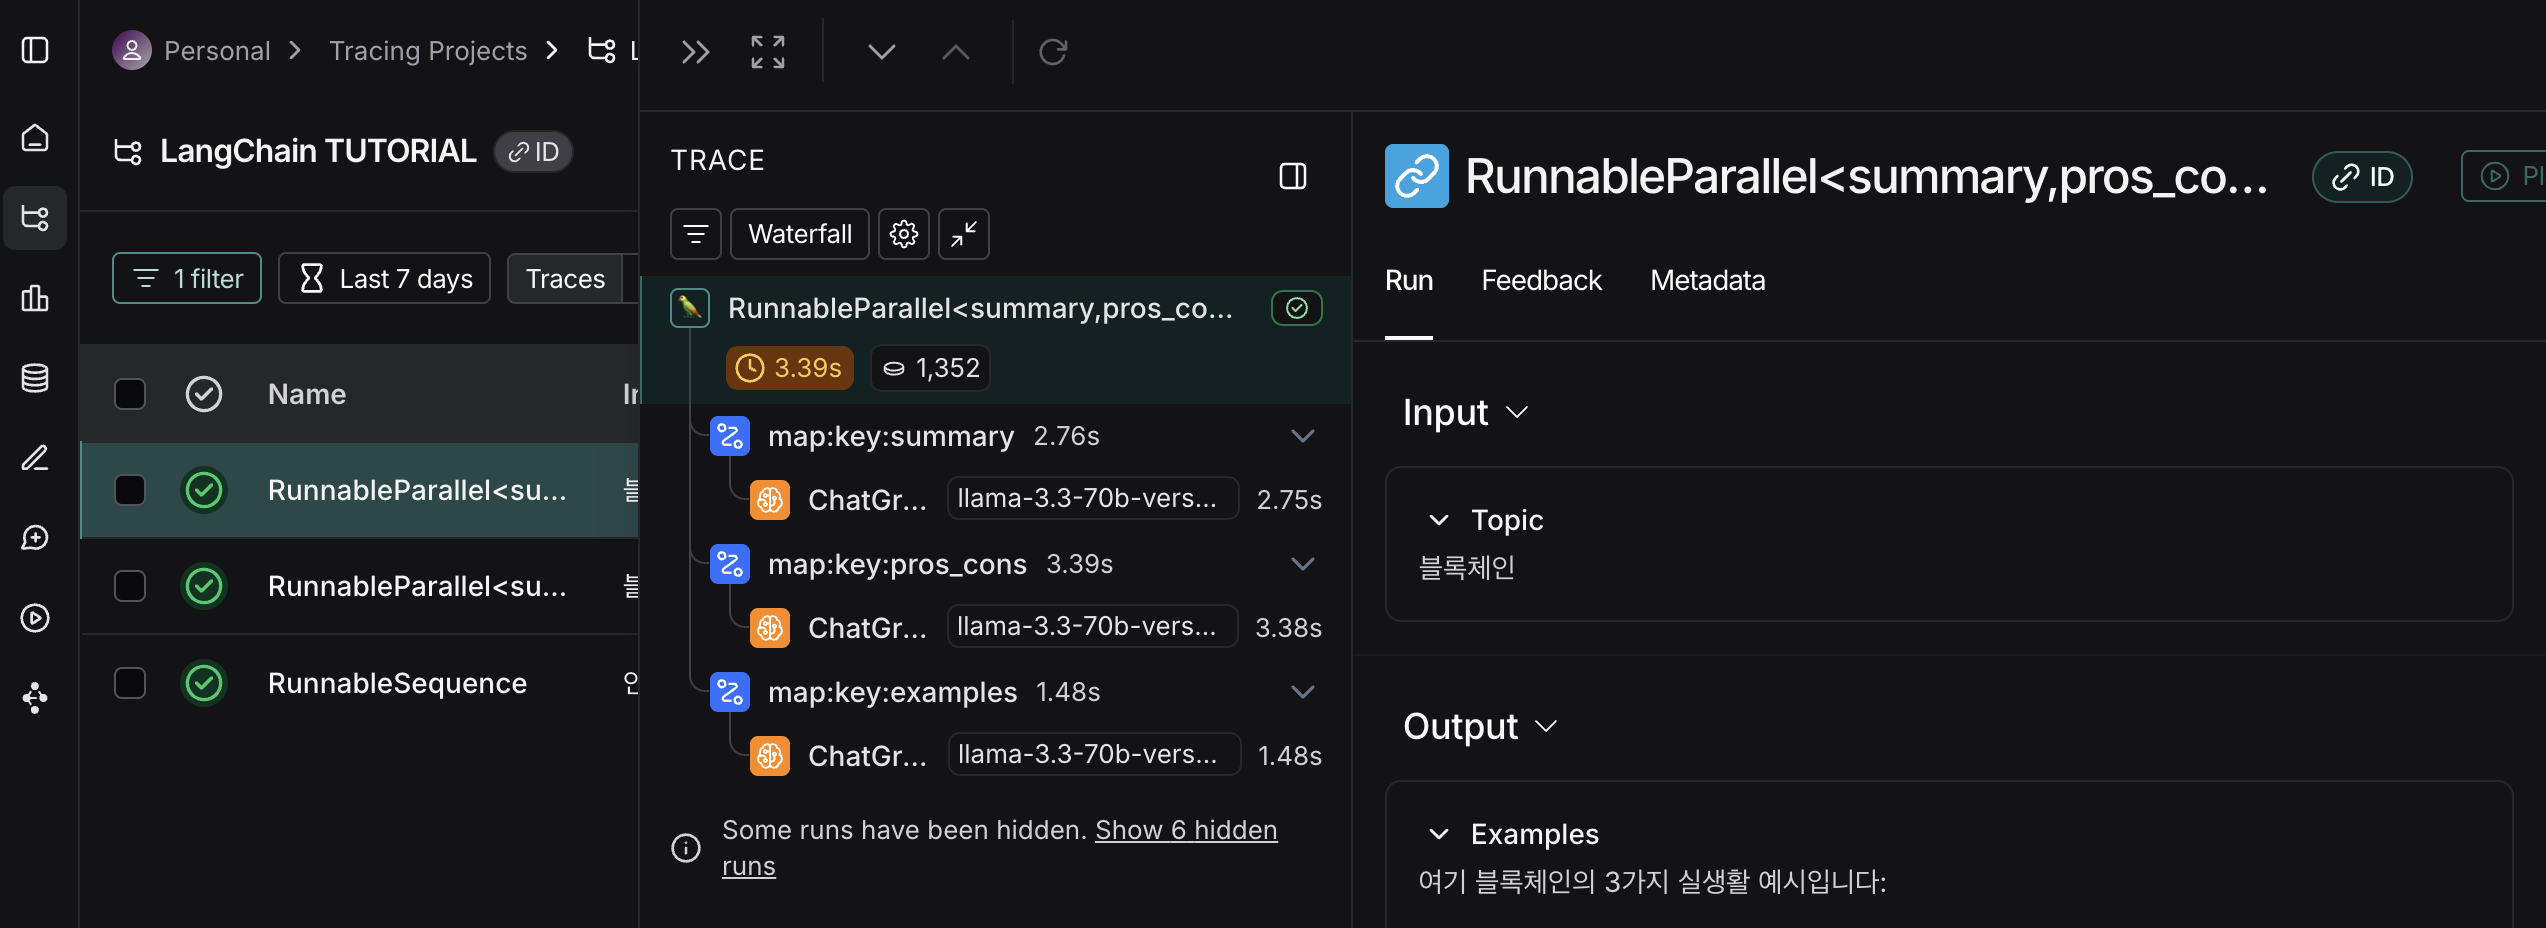